In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm


In [2]:
df = pd.read_csv("customer_purchases.csv")

# View first few rows
df.head()


,Purchase__basketValueGross,Purchase__purchaseType,Purchase__overallBasketSavings,Purchase__storeId,Purchase__paymentType__category,Purchase__paymentType__amount,Purchase__timeStamp,Purchase__basketValueNet,Purchase__says,Purchase__storeName,Purchase__storeFormat,Purchase__product__name,Purchase__product__quantity,Purchase__product__channel,Purchase__product__price
0,79.03,IN_STORE,3.17,3189.0,NaN,75.86,37:36.8,75.86,NaN,SOUTHWARK,SuperStore,Koko Dairy Free Unsweetened Alternative Longli...,5.0,IN_STORE,1.50
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tesco Bunched Spring Onions 100G,1.0,IN_STORE,0.37
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tesco Finest Cheesecake Passion Fruit & Raspbe...,1.0,IN_STORE,4.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tesco Mixed Sized Organic Eggs 6 Pack,1.0,IN_STORE,1.80
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vanish Pet Expert Carpet Care Foam 600Ml,1.0,IN_STORE,6.00


In [3]:
purchase_amounts = df['Purchase__basketValueGross']


In [5]:
# Calculate mean and standard deviation
mean = purchase_amounts.mean()
std = purchase_amounts.std()

# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(purchase_amounts, bins=30, stat="density", kde=False)

# Plot normal distribution curve
x = np.linspace(purchase_amounts.min(), purchase_amounts.max(), 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, linewidth=2)

plt.title("Histogram of Purchase Amounts with Normal Distribution Fit")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.show()


TypeError: can only concatenate str (not "int") to str

In [6]:
df['Purchase__basketValueGross'].dtype


dtype('O')

In [7]:
df['Purchase__basketValueGross'] = pd.to_numeric(
    df['Purchase__basketValueGross'],
    errors='coerce'
)


In [8]:
purchase_amounts = df['Purchase__basketValueGross'].dropna()


In [9]:
mean = purchase_amounts.mean()
std = purchase_amounts.std()

mean, std


(np.float64(31.169999999999998), np.float64(20.04339363908788))

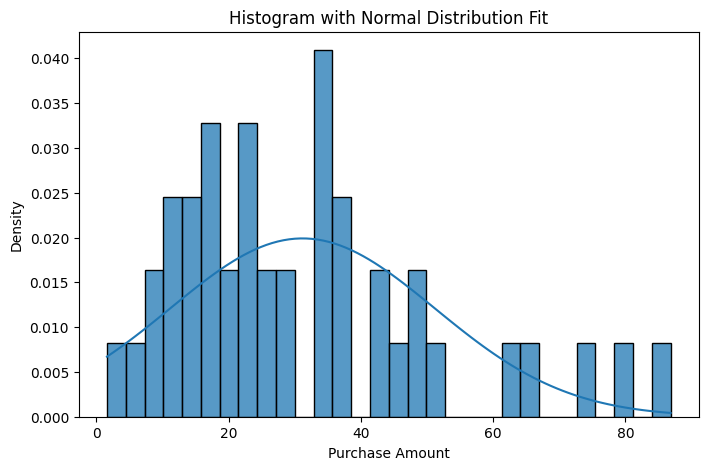

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(purchase_amounts, bins=30, stat="density")

x = np.linspace(purchase_amounts.min(), purchase_amounts.max(), 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

plt.title("Histogram with Normal Distribution Fit")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.show()
